# Project 2: Investigate a Dataset

I decided to look at Lahman's Baseball Database for this project. I’m interested in examining the characteristics of batters who get intentionally walked the most often.

## What Are Intentional Walks?

An intentional walk (also referred to as "intentional base on balls" or "IBB" in the data) is when a batter comes to the plate and the pitcher intentionally throws the batter four straight balls, generally well outside the strike zone, in order to make the batter walk to first base. This tactic prevents the batter from having a real chance to hit the ball into play and possibly score runs.

Pitchers throw a mix of strikes and balls to the vast majority of batters they face. The pitcher nearly always wants to either strike the batter out or to get the batter to make contact with the ball so as to create a play that the infield or outfield can easily field for an out. It's desirable to get a flyout or a groundball that can be thrown to first base for an out. Alternatively, if there's a runner on first base and less than two outs, the defense would like a ground ball hit to the left side that can be thrown to second and first for a double play.

An intentional walk is a somewhat unusual defensive scenario. For whatever reason, the defensive team's manager decides that it's more worthwhile to walk a given batter rather than pitch to them.

## What I'm Looking For

I'm curious if there are any noticeable patterns in the characteristics of the batters who get intentionally walked the most. I wanted to see if there were particular batting statistics that tipped the managerial decision-making scales toward intentional walks. In this investigation I treated IBB as a dependent variable, and looked at four independent variables: home runs (HR), runs batted in (RBI), slugging percentage (SLG), and strikeouts (SO). These are four common metrics used among baseball statisticians and fans. They potentially may factor into defensive team decision-making when they decide to intentionally walk a batter.

## Wrangling the Data

Here are the steps I went through to wrangle the data and get it organized for analysis. First I imported the modules necessary for the completion of this project, and set up the Jupyter notebook to allow me to view visualizations inline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next I used the pandas read_csv function in order to read in the batting data from the Lahman database's 'batting.csv' file into a pandas DataFrame. The information in this CSV includes one row for each batter's season in the major leagues since 1871. For instance, there is one row for each of the 13 years that Miguel Cabrera has played in Major League Baseball between 2003 and 2015. There are 101,332 rows of data in the file, each of which represents a batter on one team in one particular season.

In order to address empty values in the CSV, I used the fillna() function in order to fill all the empty fields in the DataFrame with zeros instead of NaNs.

In [2]:
batting_df = pd.read_csv('Batting.csv')
batting_df = batting_df.fillna(0)

I then used slicing to look at the first several rows of the DataFrame. I had already taken a look at the raw CSV file, but looking at this slice helped me get a better sense of what I was going to be working with in the DataFrame.

In [3]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,0,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,0,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,allisar01,1871,1,CL1,0,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
3,allisdo01,1871,1,WS3,0,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,ansonca01,1871,1,RC1,0,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


According to Baseball Reference (http://www.baseball-reference.com/bullpen/Intentional_walk), intentional walks were not officially recorded by the major leagues until 1955. For this reason I filtered the pandas DataFrame to include only data from 1955 onward.

In [4]:
batting_df = batting_df[batting_df['yearID'] >= 1955]

I took a look at the first several rows of this new, reduced-size DataFrame. Note that the rows of this DataFrame begin with the number 37447, because taking out the pre-1955 data got rid of 37,446 entries.

In [5]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
37447,aaronha01,1955,1,ML1,NL,153,602.0,105.0,189.0,37.0,...,106.0,3.0,1.0,49.0,61.0,5.0,3.0,7.0,4.0,20.0
37448,aberal01,1955,1,DET,AL,39,17.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,1.0
37449,abernte02,1955,1,WS1,AL,40,26.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,1.0
37450,abramca01,1955,1,BAL,AL,118,309.0,56.0,75.0,12.0,...,32.0,2.0,8.0,89.0,69.0,2.0,3.0,3.0,3.0,6.0
37451,adamsbo03,1955,1,CIN,NL,64,150.0,23.0,41.0,11.0,...,20.0,2.0,0.0,20.0,21.0,1.0,3.0,2.0,1.0,3.0


I determined that there were a few columns in the DataFrame that I did not think I would need to proceed with this particular project. In particular I decided to get rid of the following columns: stint (stint), lgID (League), games (G), stolen bases (SB), caught stealing (CS), hit by pitch (HBP), sacrifice hits (SH), sacrifice flies (SF), and grounds into double play (GIDP).

The following code shows how I filtered it down, and then shows the first 25 rows of this new, simplified data set.

In [6]:
batting_df = batting_df[['playerID', 'yearID', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'IBB']]
batting_df[:25]

,playerID,yearID,AB,R,H,2B,3B,HR,RBI,BB,SO,IBB
37447,aaronha01,1955,602.0,105.0,189.0,37.0,9.0,27.0,106.0,49.0,61.0,5.0
37448,aberal01,1955,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
37449,abernte02,1955,26.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
37450,abramca01,1955,309.0,56.0,75.0,12.0,3.0,6.0,32.0,89.0,69.0,2.0
37451,adamsbo03,1955,150.0,23.0,41.0,11.0,2.0,2.0,20.0,20.0,21.0,1.0
37452,adamsbo03,1955,21.0,8.0,2.0,0.0,1.0,0.0,3.0,4.0,4.0,0.0
37453,adcocjo01,1955,288.0,40.0,76.0,14.0,0.0,15.0,45.0,31.0,44.0,3.0
37454,agganha01,1955,83.0,11.0,26.0,10.0,1.0,0.0,10.0,10.0,10.0,0.0
37455,aguirha01,1955,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37456,alexabo01,1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Slugging percentage is one of the statistics I wanted to look at, but it was not included in the Lahman data. However, it can be calculated from this data using vector operations. I decided to make a function that would add a new column to the DataFrame showing each batter's slugging percentage for that season. Although I only planned to use it once, it turned out to be useful for going back through and checking my work, and may be useful for any future baseball analysis projects I want to do.

Slugging percentage (SLG), per the Major League Baseball official website (http://m.mlb.com/glossary/standard-stats/slugging-percentage), "represents the total number of bases a player records per at-bat." It is calculated by adding together base hits, doubles multiplied by 2, triples multiplied by 3, and home runs multiplied by four, and dividing this sum by the number of at bats.

A few steps were needed in order to calculate SLG. Base hits or "singles" are generally not recorded in baseball data as a standalone value. This turned out to be the case for the Lahman data. So I needed to take the total number of hits (H) and subtract the amount of doubles (2B), triples (3B), and home runs (HR) from that amount in order to calculate the number of singles, and add that to the data. Once I had the amount of base hits, I wanted to calculate the slugging percentage and add the value as a new column in the data. Subsequently I wanted to remove singles from the data in order to add only what I needed for this project. I decided to make a single function, 'calculate_slugging' to do all of this, and it's below.

In [7]:
def calculate_slugging(batting_df):
    """Calculate slugging percentage and add column to batting dataframe."""
    batting_df['1B'] = batting_df['H'] - (batting_df['2B'] + batting_df['3B'] + batting_df['HR'])
    batting_df['SLG'] = (batting_df['1B'] + (2 * batting_df['2B']) + (3 * batting_df['3B']) + (4 * batting_df['HR'])) / batting_df['AB']
    batting_df.drop('1B', axis=1, inplace=True)
    batting_df.fillna(0, inplace=True)
    return batting_df

Below I use this function to calculate slugging percentage, and add it as a new column at the end of the table.

In [8]:
batting_df = calculate_slugging(batting_df)
batting_df.head()

,playerID,yearID,AB,R,H,2B,3B,HR,RBI,BB,SO,IBB,SLG
37447,aaronha01,1955,602.0,105.0,189.0,37.0,9.0,27.0,106.0,49.0,61.0,5.0,0.539867
37448,aberal01,1955,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.058824
37449,abernte02,1955,26.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.153846
37450,abramca01,1955,309.0,56.0,75.0,12.0,3.0,6.0,32.0,89.0,69.0,2.0,0.359223
37451,adamsbo03,1955,150.0,23.0,41.0,11.0,2.0,2.0,20.0,20.0,21.0,1.0,0.413333


## Exploring the Data

Now that I have the data wrangled into a form that I can work with, I wanted to begin to explore and analyze the data. The dependent value that I'm looking at is intentional walks (IBB), which I took an initial look at as a NumPy array independent of the DataFrame.

In [9]:
IBB_values = batting_df['IBB'].values

The piece of code above extracts the IBB column from the DataFrame and creates a NumPy array object. First I'll take a look at the mean number of intentional walks a batter gets per season.

In [10]:
IBB_values.mean()

1.1322376144634891

It turns out that the mean number of intentional walks for a player per season is 1.13.

Next I'll take a look at the all-time maximum value for intentional walks in a season.

In [11]:
IBB_values.max()

120.0

Someone was walked 120 times in a season. In order to find out who this was, I decided to look at the all-time single-season leaders for intentional walks at the Baseball Reference website (http://www.baseball-reference.com/leaders/IBB_season.shtml). It turns out it was Barry Bonds in his 2004 season with the San Francisco Giants.

The minimum value for intentional walks in a season, which I observed right away in the data, is 0. Out of curiosity, I wanted to find out how many non-zero values were in the table for IBB, so I used the 'count_nonzero' NumPy array method to find out.

In [12]:
np.count_nonzero(IBB_values)

18532

It turns out that there are 18,532 entries for players who were walked at least once in a season.

Now I'd like to make a few DataFrames that contain information I'd like to visualize as scatter plots and histograms for analysis. First I'm creating a DataFrame identical to our existing one, except sorted in descending order by number of intentional walks in a season.

As you can see, Barry Bonds (whose 'playerID' is 'bondsba01') sits atop the list, and actually holds several of the other top records for intentional walks in a season.

In [13]:
batting_df_by_IBB = batting_df.sort_values('IBB', ascending=False)
batting_df_by_IBB[:50]

,playerID,yearID,AB,R,H,2B,3B,HR,RBI,BB,SO,IBB,SLG
84759,bondsba01,2004,373.0,129.0,135.0,27.0,3.0,45.0,101.0,232.0,41.0,120.0,0.812332
82079,bondsba01,2002,403.0,117.0,149.0,31.0,2.0,46.0,110.0,198.0,47.0,68.0,0.799007
83407,bondsba01,2003,390.0,111.0,133.0,22.0,1.0,45.0,90.0,148.0,58.0,61.0,0.748718
47775,mccovwi01,1969,491.0,101.0,157.0,26.0,2.0,45.0,126.0,121.0,66.0,45.0,0.655804
92468,pujolal01,2009,568.0,124.0,186.0,45.0,1.0,47.0,135.0,115.0,64.0,44.0,0.658451
70777,bondsba01,1993,539.0,129.0,181.0,38.0,4.0,46.0,123.0,126.0,79.0,43.0,0.677180
88804,bondsba01,2007,340.0,75.0,94.0,14.0,0.0,28.0,66.0,132.0,54.0,43.0,0.564706
48714,mccovwi01,1970,495.0,98.0,143.0,39.0,2.0,39.0,126.0,137.0,75.0,40.0,0.612121
93829,pujolal01,2010,587.0,115.0,183.0,39.0,1.0,42.0,118.0,103.0,76.0,38.0,0.596252
87430,bondsba01,2006,367.0,74.0,99.0,23.0,0.0,26.0,77.0,115.0,51.0,38.0,0.544959


In order to pare down the data to the dependent variable (intentional walks) and the independent variables I'm looking at (home runs, runs batted in, strikeouts, and slugging percentage), I'm going to create another smaller DataFrame containing the top 50 entries for intentional walks in a season. I'm doing this in order to compare the players who are intentionally walked the most with other players over time.

In [14]:
top_50_IBB = batting_df_by_IBB[:50].filter(items=['playerID', 'yearID', 'HR', 'RBI', 'SO', 'IBB', 'GIDP', 'SLG'])
top_50_IBB.head()

,playerID,yearID,HR,RBI,SO,IBB,SLG
84759,bondsba01,2004,45.0,101.0,41.0,120.0,0.812332
82079,bondsba01,2002,46.0,110.0,47.0,68.0,0.799007
83407,bondsba01,2003,45.0,90.0,58.0,61.0,0.748718
47775,mccovwi01,1969,45.0,126.0,66.0,45.0,0.655804
92468,pujolal01,2009,47.0,135.0,64.0,44.0,0.658451


### Visualizing and Analyzing the Data

The scatter plot graphs below show home runs, runs batted in, slugging percentage, and strikeouts for the top 50 single-season intentional walk records as yellow plot points. These points are overlaid on points representing every major league player's single-season performances since 1955, when the majors began officially recording intentional walks.

I used the built-in matplotlib functionality for pandas DataFrames in order to make these scatter plots. The x-axis in each of these plots represents the row index numbers automatically assigned by pandas to the data. Earlier I chopped out all pre-1955 data, which resulted in the first 37,446 records of the DataFrame being removed. The x-values begin at 37,447 and conclude at 101,332, the last row of the original DataFrame. I set the x-axis limits at 37,440 and 101,340 so as to show the full range of points. The y-axis is different for each plot, representing the range of statistics under consideration in each case.

For two of the independent variables - home runs and runs batted in - I looked at career numbers as well, and charted that information in histograms.

### RBIs

In the first figure below we see single-season runs batted in (RBIs) records for every player since 1955. The players with the top number of intentional walks are highlighted in yellow. It's immediately apparent that the vast majority of players are at 80 or less RBIs per season.

Looking at the yellow points representing the top 50 records for single-season intentional walks, it appears that most of these records go along with 100+ RBIs in a season. Sammy Sosa's 2001 season, in which he had 160 RBIs, appears near the top of the chart, while most of the rest of these yellow points fall between 100 and 140 RBIs in a season.

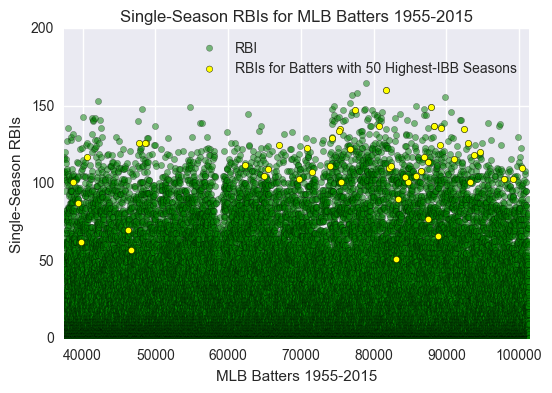

In [34]:
plt.figure()
plt.title("Single-Season RBIs for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
plt.ylabel("Single-Season RBIs")
plt.xlim(37440, 101340)
plt.ylim(0, 200)
plt.scatter(batting_df.index, batting_df['RBI'], c='green', alpha=0.5)
plt.scatter(top_50_IBB.index, top_50_IBB['RBI'], c='yellow', label='RBIs for Batters with 50 Highest-IBB Seasons')
plt.legend()
plt.show()

The way in which the top 50 RBIs are distributed makes it seem like it's possible that the batter's number of RBIs in a season could be a metric that influences the number of intentional walks a batter gets. This seems like it would make sense, as batters who get intentionally walked may be believed by the defensive team to be a threat to drive home batters who are currently on base. Alternatively, they may be more likely to drive in runs than whoever is batting behind them, and the pitcher wants to get to that next batter.

It seemed like it made sense to look at this part of the data from another angle: individual players' career numbers for RBIs and intentional walks. Below is the code I used to chart out, in histogram form, career numbers for individual players in both RBIs and IBBs.

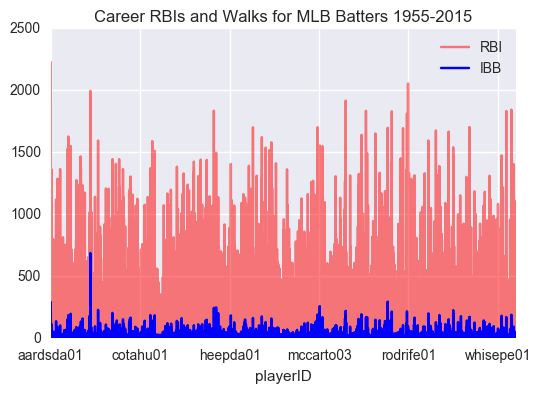

In [30]:
plt.figure()
plt.title("Career RBIs and Walks for MLB Batters 1955-2015")
RBI_by_player = batting_df.groupby('playerID').sum()['RBI'].plot(c='red', alpha=0.5)
intentional_walks_by_player = batting_df.groupby('playerID').sum()['IBB'].plot(c='blue')
plt.legend()
plt.show()

One thing I can see is that batters get way more career RBIs than they do intentional walks, which makes sense. Looking at the spikes in the IBB data (in blue), it does appear that those spikes have corresponding spikes in the RBI data right behind it (in light red).

Unless a given batter has been in the major leagues for a long period of time, a team manager does not have the benefit of long-term hindsight into a batter's numbers. Instead they may be working with the numbers for that season so far as well as the season or two prior. It is nonetheless interesting to get a sense of whether high-IBB batters are/were also high-RBI batters, and it appears that many of them are.

### Home Runs

I also wanted to look at whether a batter's number of home runs in a single season could be a variable affecting the number of intentional walks a batter gets. I plotted out the single-season home run numbers as yellow points over the data for every batter in the 1955-2015 range.

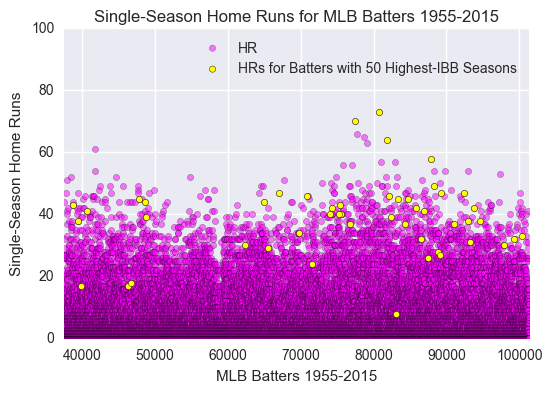

In [35]:
plt.figure()
plt.title("Single-Season Home Runs for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
plt.ylabel("Single-Season Home Runs")
plt.xlim(37447, 101331)
plt.ylim(0, 100)
plt.scatter(batting_df.index, batting_df['HR'], c='magenta', alpha=0.5)
plt.scatter(top_50_IBB.index, top_50_IBB['HR'], c='yellow', label='HRs for Batters with 50 Highest-IBB Seasons')
plt.legend()
plt.show()

The intentional walks data on this graph is quite a bit more spread out than it was on the RBIs graph. One of the most intentionally-walked batters had less than 10 home runs in a season (Ichiro Suzuki had 8 home runs in his 2002 season with the Seattle Mariners) and another had as high as 73 home runs in a season (Barry Bonds in his 2001 season with the San Francisco Giants). It looks like most of the top 50 intentionally walked batters are in the 30 to 50-home run range, which is a strong regular-season home run record.

Let's also take a look at how career numbers for home runs and intentional walks compare, using a histogram chart similar to the one we used for looking at career RBIs and intentional walks earlier.

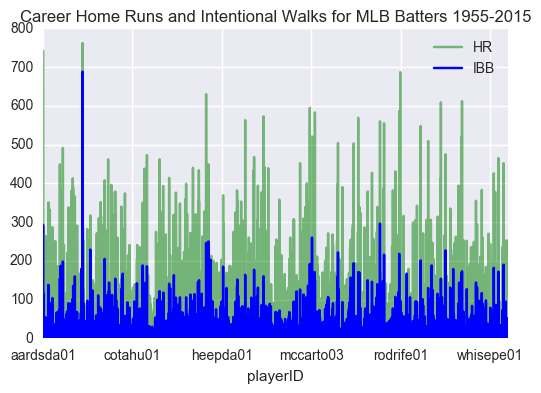

In [28]:
plt.figure()
plt.title("Career Home Runs and Intentional Walks for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
HR_by_player = batting_df.groupby('playerID').sum()['HR'].plot(c='green', alpha=0.5)
intentional_walks_by_player = batting_df.groupby('playerID').sum()['IBB'].plot(c='blue')
plt.legend()
plt.show()

These two graphs do not correspond directly across the board, but they do have a similar shape that's particularly noticeable where the two sets of data spike. There do not appear to be any points where a player has a high number of career intentional walks and a low number of home runs. Indeed, while not all players with high home run totals are intentionally walked very often, most of the players who get intentionally walked a lot appear to also hit a lot of home runs over their career.

### Slugging Percentage

Slugging percentage, as discussed earlier, is meant to represent how many bases a batter gets per at-bat. It is not really a "percentage" per se. Rather it provides a decimal number between 0.0 and 4.0 representing the number of bases a batter gets on average per at-bat. I used vector operations to add a new column to the batting DataFrame for each row with single-season slugging percentage. First I want to look at a scatter plot of slugging percentages for everyone in the 1955-2015 timeframe.

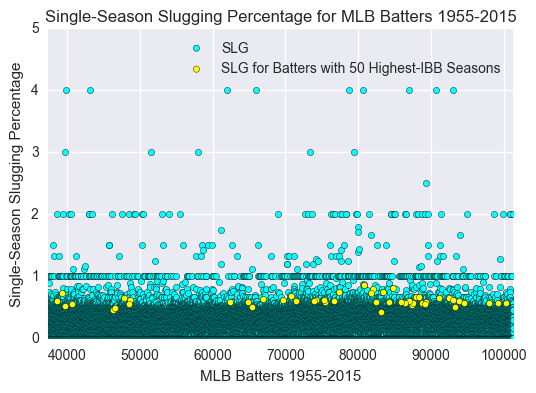

In [36]:
plt.figure()
plt.title("Single-Season Slugging Percentage for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
plt.ylabel("Single-Season Slugging Percentage")
plt.xlim(37447, 101331)
plt.ylim(0, 5.0)
plt.scatter(batting_df.index, batting_df['SLG'], c='cyan')
plt.scatter(top_50_IBB.index, top_50_IBB['SLG'], c='yellow', label='SLG for Batters with 50 Highest-IBB Seasons')
plt.legend()
plt.show()

The vast majority of points on this scatter plot fall below 1.0, as very few batters reliably hit a single or better at every at-bat. Indeed, it appears that the batters who show up at 1.0 or higher are few and far between. I decided to take a more zoomed-in look at this graph, putting 1.0 as the upper ylim for the scatter plot display. This view is below.

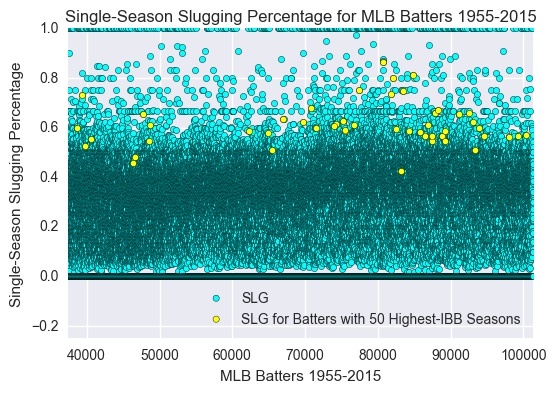

In [45]:
plt.figure()
plt.title("Single-Season Slugging Percentage for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
plt.ylabel("Single-Season Slugging Percentage")
plt.xlim(37447, 101331)
plt.ylim(-0.25, 1.0)
plt.scatter(batting_df.index, batting_df['SLG'], c='cyan')
plt.scatter(top_50_IBB.index, top_50_IBB['SLG'], c='yellow', label='SLG for Batters with 50 Highest-IBB Seasons')
plt.legend(loc='lower right')
plt.show()

It looks like the most dense cluster of slugging percentages falls in the 0.300 to 0.500 range, where the mass of cyan-colored dots becomes greyish in its density. The yellow dots representing the top 50 intentionally walked batters do appear to be on the higher end of the slugging percentage range, between 0.500 and 0.800.

As MLB.com notes in its definition of slugging percentage (http://m.mlb.com/glossary/standard-stats/slugging-percentage), it is not a perfect measure of a hitter's power, as a double is not necessarily exactly twice as valuable as a single when it comes to getting runs. However, a high slugging percentage suggests that a batter is hitting for power, and a batter that hits for power is the kind of threat at home plate that might make them more likely to get intentionally walked by a pitcher.

The high slugging percentages seen here for the high-IBB data seems to correspond with the high home-run totals that many of these hitters have. It's certainly possible that managers factor in strong slugging when they decide to intentionally walk a particular batter.

### Strikeouts

I also wanted to look at strikeouts for the most intentionally walked batters. Perhaps these batters have low strikeout totals, and are more likely to get on base than other batters on their team.

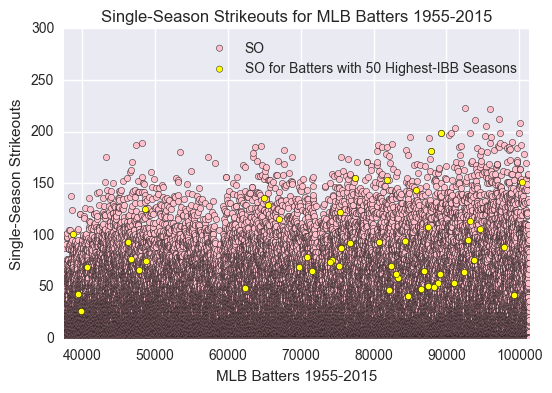

In [44]:
plt.figure()
plt.title("Single-Season Strikeouts for MLB Batters 1955-2015")
plt.xlabel("MLB Batters 1955-2015")
plt.ylabel("Single-Season Strikeouts")
plt.xlim([37447, 101331])
plt.ylim([0, 300])
plt.scatter(batting_df.index, batting_df['SO'], c='pink')
plt.scatter(top_50_IBB.index, top_50_IBB['SO'], c='yellow', label='SO for Batters with 50 Highest-IBB Seasons')
plt.legend()
plt.show()

It appears that over half of the batters with the highest intentional walks have been struck out less than 100 times. However, the data appears to be distributed in a way that it's difficult to posit even tentatively that there may be any kind of relationship between strikeouts and intentional walks.

This seems to make sense, in that hitting for power does not necessarily mean that a player will also strike out either rarely or frequently. A batter that gets intentionally walked in a particular game may be on a hot streak of getting on base through either walks or hits, and may be striking out more rarely than usualy. However it appears that low strikeout totals for a season do not appear to have an observable relationship with intentional walks.

## Drawing Conclusions

What I was able to observe in the data was that the batters who get intentionally walked the most appear to have a good single-season home run total, a high number of RBIs on the season, and an above-average slugging percentage. There did not, however, appear to be an observable relationship between strikeouts and intentional walks. The home run, RBI, and slugging percentage data suggests that having batting statistics that signify being a threat to drive in runs could make a batter more likely to get intentionally walked. 

Obviously there are several limitations to the approach I took to looking at the data. I only looked at the top 50 single-season intentional walk records, several of whom are the same batter (Barry Bonds, for instance, holds 11 of these records), in comparison with everyone else. Additionally, this kind of data does not account for who batted before/after each batter in a particular lineup, and this can have a potentially large effect on the number of intentional walks a batter gets. Even a hitter who does not have a high number of home runs, RBIs, or a high slugging percentage might get walked purely for the reason that the next batter in the lineup is just a little bit less likely to drive in runs.

Additionally, the data is not accounting for specific game scenarios, and the scenario seems like it may play a huge role in when intentional walks occur. If there are one or more runners on base and the batter is believed to be a threat to drive in runs (or more of a threat than the batter after them), this might increase the likelihood of an intentional walk. There was one unusual occasion on May 28, 1998 (http://deadspin.com/the-time-barry-bonds-was-intentionally-walked-with-the-1707513738) that Barry Bonds was intentionally walked while the bases were loaded - apparently the pitcher and manager felt it was safer to walk in a run than to potentially let Bonds drive in more than one run.

There are several other potential factors to consider when it comes to which hitters get intentional walks. Here are a few that I was able to think of:
- The pitcher may be left-handed or right-handed and the batter coming up may not be favorable match-up in this respect.
- The intentionally walked batter may appear low in the lineup, batting eighth, and is followed by a batter (potentially the pitcher, if it's a National League game) who's likely to either strike out, ground out, or fly out.
- The current batter has historically done very well against the current pitcher, or the following batter has historically done comparatively poorly against the current pitcher.
- The next batter in the lineup may be prone to grounding into double plays.

Intentional walks are a phenomenon that I'd be keen to explore more in the future from other angles. It would be especially interesting to dive into the in-depth game-by-game information available at Retrosheet (http://www.retrosheet.org) and get a sense of how placement in the batting order affects a player's number of intentional walks. 

## Resources
- http://www.baseball-reference.com/players/s/suzukic01.shtml
- http://www.baseball-reference.com/players/c/cabremi01.shtml
- http://www.baseball-reference.com/players/r/rosepe01.shtml
- http://www.baseball-reference.com/leaders/IBB_season.shtml
- http://matplotlib.org/api/colors_api.html
- http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html 
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
- http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
- http://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python 
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.count_nonzero.html
- http://deadspin.com/the-time-barry-bonds-was-intentionally-walked-with-the-1707513738
- http://www.baseball-reference.com/bullpen/Intentional_walk
- http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
- http://matplotlib.org/users/legend_guide.html
- http://matplotlib.org/api/pyplot_api.html